In [56]:
import numpy as np
K_num = 7
J_num = 40

q = np.array([200, 100, 50, 400, 1000, 20, 300] )

r = np.array([
[0, 0, 0, 0, 0, 6, 0 ],
[0, 28, 0, 0, 0, 0, 147 ],
[0, 0, 11, 0, 0, 1, 81 ],
[0, 44, 23, 237, 0, 10, 0 ],
[0, 0, 0, 127, 0, 0, 0 ],
[101, 0, 0, 0, 0, 11, 0 ],
[0, 0, 0, 0, 533, 0, 125 ],
[0, 47, 0, 106, 0, 1, 0 ],
[0, 5, 0, 0, 0, 0, 0 ],
[0, 17, 0, 112, 268, 0, 26 ],
[0, 0, 0, 0, 474, 0, 70 ],
[30, 0, 0, 0, 56, 0, 0 ],
[62, 0, 0, 0, 507, 11, 0 ],
[36, 21, 11, 163, 0, 0, 0 ],
[55, 0, 0, 0, 452, 2, 0 ],
[0, 0, 24, 234, 0, 0, 0 ],
[114, 0, 11, 0, 216, 0, 0 ],
[0, 29, 0, 0, 447, 0, 105 ],
[0, 48, 0, 0, 307, 0, 0 ],
[0, 0, 0, 77, 0, 0, 0 ],
[16, 0, 20, 0, 0, 0, 61 ],
[21, 0, 0, 228, 0, 4, 71 ],
[30, 0, 0, 0, 0, 0, 0 ],
[68, 18, 0, 0, 315, 5, 0 ],
[60, 0, 0, 55, 430, 9, 0 ],
[85, 0, 0, 109, 0, 0, 0 ],
[0, 0, 9, 0, 0, 0, 161 ],
[0, 32, 0, 197, 0, 0, 16 ],
[0, 0, 0, 0, 478, 0, 0 ],
[0, 0, 30, 0, 485, 0, 93 ],
[42, 20, 20, 0, 0, 4, 0 ],
[0, 0, 0, 0, 0, 6, 0 ],
[0, 0, 0, 0, 130, 0, 0 ],
[86, 0, 0, 210, 525, 0, 0 ],
[0, 23, 0, 0, 0, 12, 0 ],
[0, 50, 0, 0, 471, 1, 126 ],
[0, 52, 4, 96, 0, 0, 122 ],
[0, 31, 0, 0, 0, 0, 136 ],
[113, 0, 0, 98, 524, 9, 0 ],
[0, 0, 5, 0, 0, 0, 114 ]])

ro = [6, 7, 1, 8, 4, 1, 4, 2, 1, 4, 5, 3, 4, 8, 2, 6, 1, 8, 1, 3, 3, 7, 8, 7, 2, 5, 7, 6, 5, 8, 9, 5, 9, 2, 6, 9, 1, 2, 10,6 ]

In [57]:
import gurobipy as gp
from gurobipy import GRB
def solve_knapsack(J_num, K_num, r, R, constrs):
    problem = gp.Model('knapsack')
    x = problem.addVars(J_num, vtype=GRB.BINARY, name='x')
    problem.addConstrs((sum([x[i] * r[i,k] for i in range(J_num)]) <= constrs[k] for k in range(K_num)),  name='constrs')
    problem.setObjective(sum([x[i] * R[i] for i in range(J_num)]), GRB.MAXIMIZE)
    problem.update()
    problem.optimize()
    result = []
    for i in range(J_num):
        if x[i].X == 1:
            result.append(i)
    return result

In [91]:
import numpy as np

t = 0
C = []
A = []
S = np.ones(J_num)*9999
l = 0
done_tasks_num = 0
tasks_in_process = 0
while done_tasks_num+tasks_in_process < J_num:
    l+=1
    t = min([S[j] + ro[j] for j in A]) if len(A)>0 else 0

    for j in A[:]:
        if S[j]+ro[j] <=t:
            C.append(j)
            A.remove(j)
    done_tasks_num = len(C)

    D = []
    for j in range(J_num):
        if j in A or j in C:
            continue
        if len(A) > 0:
            if  np.all(np.sum(r[A], axis=0)+r[j] <=q):
                D.append(j)
        elif np.all(r[j] <=q):
            D.append(j)
            
    #choose D'
    R = r.sum(axis=1)/q.sum()
    for i in set(range(J_num)) - set(D):
        R[i] = -1
    constrs = np.zeros(K_num)
    for k in range(K_num):
        constrs[k] = np.sum(r[A][:, k])
    constrs = q-constrs
    D_dashed = solve_knapsack(J_num, K_num, r, R, constrs)
    
    #another choosing technique
#     R = ro.copy()
#     for i in set(range(J_num)) - set(D):
#         R[i] = -1
#     constrs = np.zeros(K_num)
#     for k in range(K_num):
#         constrs[k] = np.sum(r[A][:, k])
#     constrs = q-constrs
#     D_dashed = solve_knapsack(J_num, K_num, r, R, constrs)
    
    for idx in D_dashed:
        S[idx] = t
    A.extend(D_dashed)
    tasks_in_process = len(A)
    print('------------------')



Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 7 rows, 40 columns and 102 nonzeros
Model fingerprint: 0x1e025f98
Variable types: 0 continuous, 40 integer (40 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+02]
  Objective range  [2e-03, 4e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+01, 1e+03]
Found heuristic solution: objective 0.9125604
Presolve removed 0 rows and 1 columns
Presolve time: 0.00s
Presolved: 7 rows, 39 columns, 101 nonzeros
Variable types: 0 continuous, 39 integer (38 binary)

Root relaxation: objective 1.000000e+00, 26 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    1.00000    0    7    0.91256    1.00000  9.58%     -    0s
H    0     0                       0.9608696    1.00000  4.07%     - 


     0     0 infeasible    0         0.42222    0.42222  0.00%     -    0s

Explored 0 nodes (5 simplex iterations) in 0.01 seconds
Thread count was 8 (of 8 available processors)

Solution count 1: 0.422222 
No other solutions better than 0.422222

Optimal solution found (tolerance 1.00e-04)
Best objective 4.222222222222e-01, best bound 4.222222222222e-01, gap 0.0000%
------------------
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 7 rows, 40 columns and 102 nonzeros
Model fingerprint: 0x61b63927
Variable types: 0 continuous, 40 integer (40 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+02]
  Objective range  [1e-01, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+00, 3e+02]
Found heuristic solution: objective 0.1246377

Explored 0 nodes (0 simplex iterations) in 0.01 seconds
Thread count was 1 (of 8 available processors)

Solution count 1: 0.124638

------------------
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 7 rows, 40 columns and 102 nonzeros
Model fingerprint: 0xe6e6206e
Variable types: 0 continuous, 40 integer (40 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+02]
  Objective range  [2e-01, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+01, 5e+02]
Found heuristic solution: objective 0.2676329
Presolve removed 7 rows and 40 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds
Thread count was 1 (of 8 available processors)

Solution count 2: 0.313043 0.267633 
No other solutions better than 0.313043

Optimal solution found (tolerance 1.00e-04)
Best objective 3.130434782609e-01, best bound 3.130434782609e-01, gap 0.0000%
------------------
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical 

In [92]:
S

array([ 0.,  1.,  0., 22.,  7.,  5.,  8.,  0.,  1.,  3., 20.,  0., 32.,
        2.,  0., 10., 12., 12.,  2.,  0.,  8., 30.,  0.,  7., 25.,  0.,
       16., 16., 27.,  0., 13.,  0.,  2., 37.,  6., 24.,  0., 14., 14.,
        8.])

In [93]:
(S+ro).max()

39.0

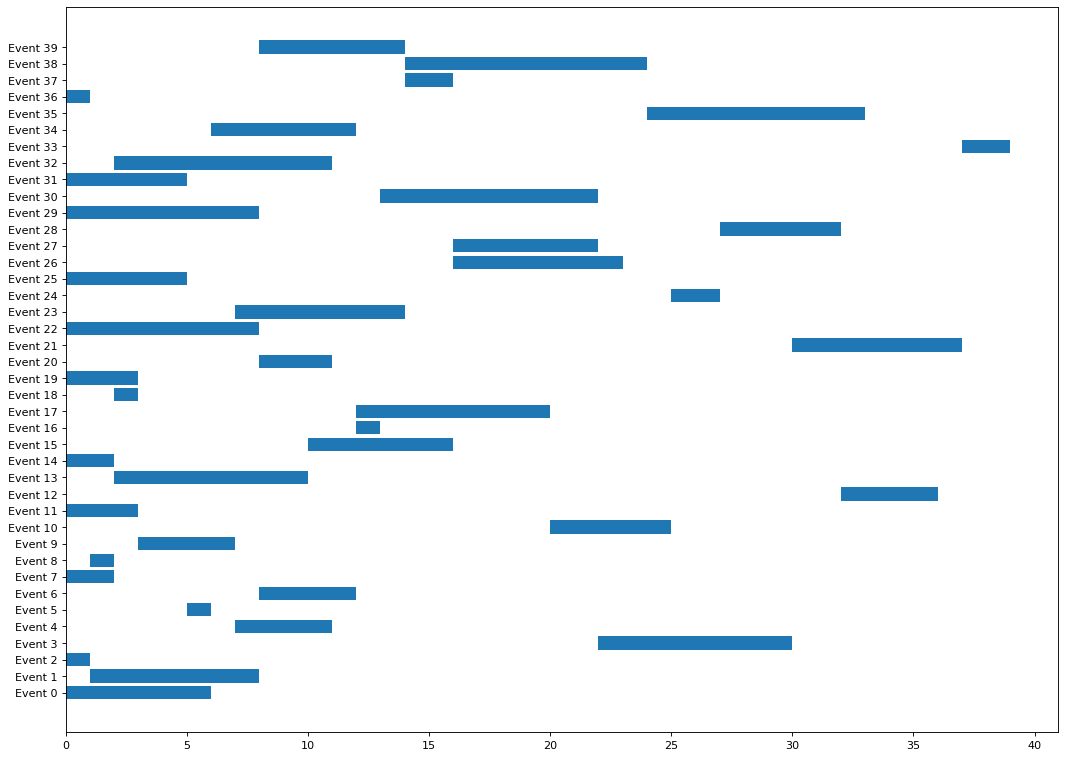

In [94]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(16, 12), dpi=80)

begin = S
end =   S+ro
event = ["Event {}".format(i) for i in range(len(begin))]

plt.barh(range(len(begin)),  end-begin, left=begin)

plt.yticks(range(len(begin)), event)
plt.show()

In [84]:
import numpy as np

t = 0
C = []
A = []
S = np.ones(J_num)*9999
l = 0
done_tasks_num = 0
tasks_in_process = 0
while done_tasks_num+tasks_in_process < J_num:
    l+=1
    t = min([S[j] + ro[j] for j in A]) if len(A)>0 else 0

    for j in A[:]:
        if S[j]+ro[j] <=t:
            C.append(j)
            A.remove(j)
    done_tasks_num = len(C)

    D = []
    for j in range(J_num):
        if j in A or j in C:
            continue
        if len(A) > 0:
            if  np.all(np.sum(r[A], axis=0)+r[j] <=q):
                D.append(j)
        elif np.all(r[j] <=q):
            D.append(j)
            
    #choose D'
#     R = r.sum(axis=1)/q.sum()
#     for i in set(range(J_num)) - set(D):
#         R[i] = -1
#     constrs = np.zeros(K_num)
#     for k in range(K_num):
#         constrs[k] = np.sum(r[A][:, k])
#     constrs = q-constrs
#     D_dashed = solve_knapsack(J_num, K_num, r, R, constrs)
    
    #another choosing technique
    R = ro.copy()
    for i in set(range(J_num)) - set(D):
        R[i] = -1
    constrs = np.zeros(K_num)
    for k in range(K_num):
        constrs[k] = np.sum(r[A][:, k])
    constrs = q-constrs
    D_dashed = solve_knapsack(J_num, K_num, r, R, constrs)
    
    for idx in D_dashed:
        S[idx] = t
    A.extend(D_dashed)
    tasks_in_process = len(A)
    print('------------------')



Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 7 rows, 40 columns and 102 nonzeros
Model fingerprint: 0xbfa526a3
Variable types: 0 continuous, 40 integer (40 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+02]
  Objective range  [1e+00, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+01, 1e+03]
Found heuristic solution: objective 45.0000000
Presolve time: 0.00s
Presolved: 7 rows, 40 columns, 102 nonzeros
Variable types: 0 continuous, 40 integer (40 binary)

Root relaxation: objective 8.283366e+01, 17 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   82.83366    0    5   45.00000   82.83366  84.1%     -    0s
H    0     0                      74.0000000   82.83366  11.9%     -    0s
H    0     0                   

  Objective range  [1e+00, 7e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [8e+00, 5e+02]
Found heuristic solution: objective 5.0000000
Presolve removed 7 rows and 40 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds
Thread count was 1 (of 8 available processors)

Solution count 2: 10 5 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.000000000000e+01, best bound 1.000000000000e+01, gap 0.0000%
------------------
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 7 rows, 40 columns and 102 nonzeros
Model fingerprint: 0x1c243669
Variable types: 0 continuous, 40 integer (40 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+02]
  Objective range  [1e+00, 2e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+00, 7e+02]
Found heuristic solution: objective 2.0000000

Exp

Presolve removed 7 rows and 40 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds
Thread count was 1 (of 8 available processors)

Solution count 1: 12 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.200000000000e+01, best bound 1.200000000000e+01, gap 0.0000%
------------------
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 7 rows, 40 columns and 102 nonzeros
Model fingerprint: 0x0e6479b1
Variable types: 0 continuous, 40 integer (40 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+02]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+01, 4e+02]
Found heuristic solution: objective 1.0000000

Explored 0 nodes (0 simplex iterations) in 0.01 seconds
Thread count was 1 (of 8 available processors)

Solution count 1: 1 

Optimal solution found (tol

In [85]:
(S+ro).max()

40.0

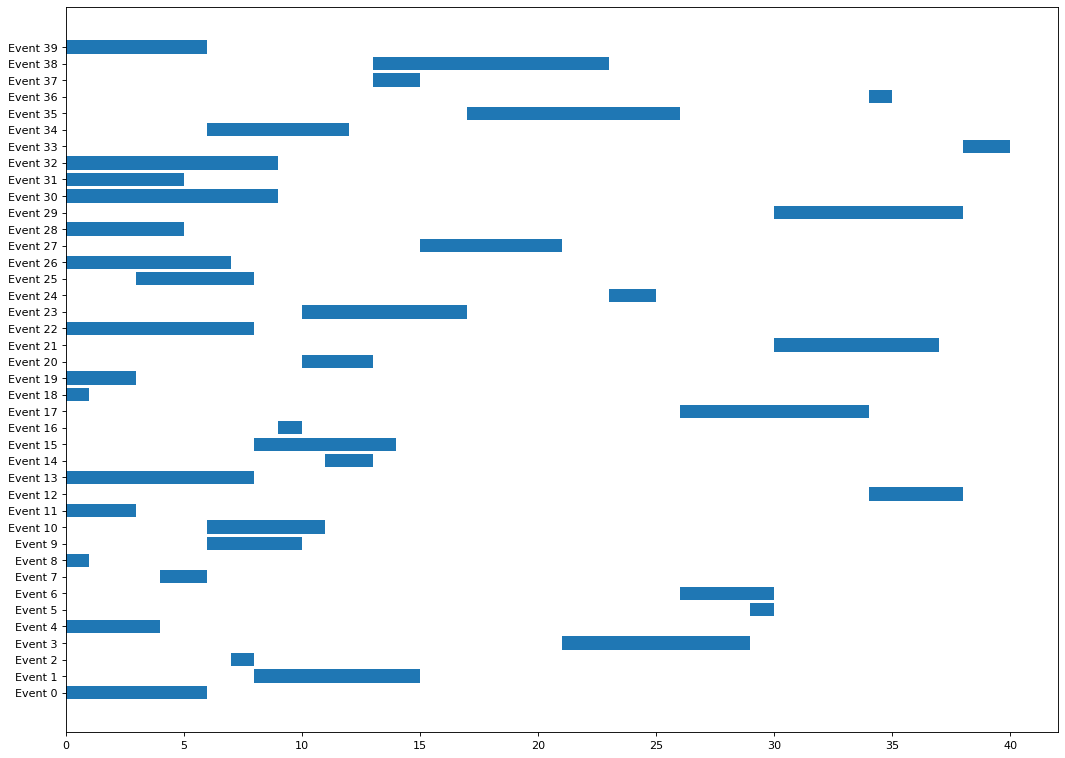

In [89]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(16, 12), dpi=80)

begin = S
end =   S+ro
event = ["Event {}".format(i) for i in range(len(begin))]

plt.barh(range(len(begin)),  end-begin, left=begin)

plt.yticks(range(len(begin)), event)
plt.show()

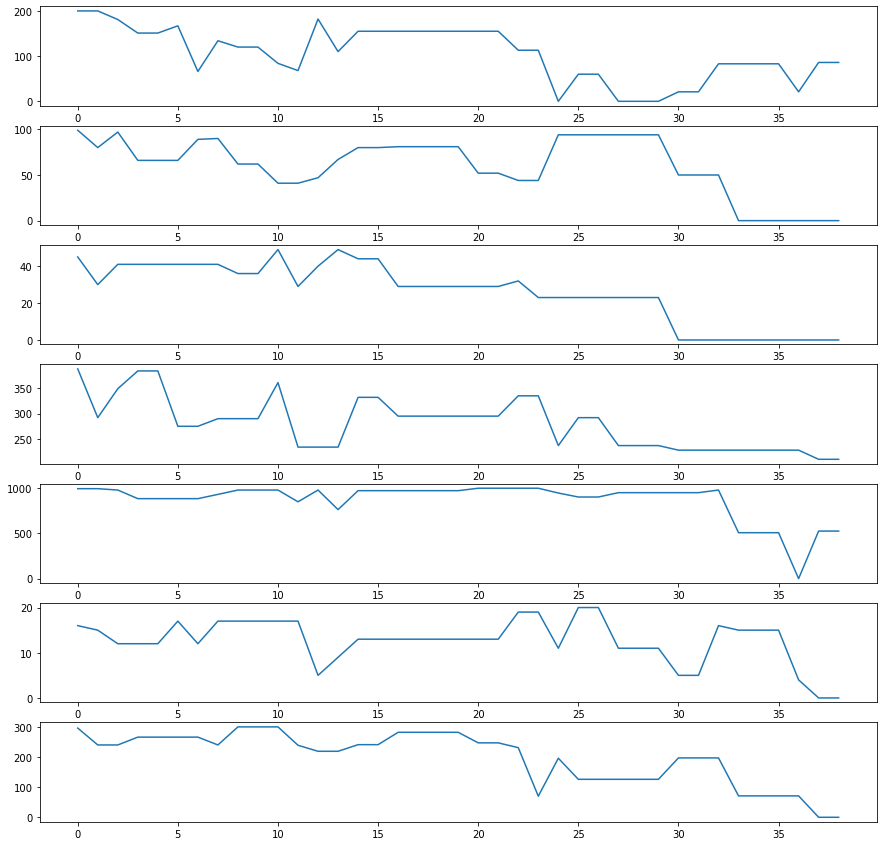

In [115]:
load = []
for t in range(int((S+ro).max())):
    indexes = (S<=t) & (S+ro > t)
    load.append( r[indexes].sum(axis=0))

load = np.array(load).T
fig, axs = plt.subplots(7, figsize=(15,15))
for i in range(7):
    axs[i].plot(load[i])
    

In [144]:
import gurobipy as gp
from gurobipy import GRB
def solve_knapsack_2(J_num, K_num, r, constrs):
    problem = gp.Model('knapsack')
    x = problem.addVars(J_num, vtype=GRB.BINARY, name='x')
    
    problem.addConstrs((sum([x[i] * r[i,k] for i in range(J_num)]) <= constrs[k] for k in range(K_num)),  name='constrs')
    problem.setObjective(sum([x[i] * r[i, j] for i in range(J_num) for j in range(K_num)]), GRB.MAXIMIZE)
    problem.update()
    problem.optimize()
    result = []
    for i in range(J_num):
        if x[i].X == 1:
            result.append(i)
    return result

import numpy as np

t = 0
C = []
A = []
S = np.ones(J_num)*9999
l = 0
done_tasks_num = 0
tasks_in_process = 0
while done_tasks_num+tasks_in_process < J_num:
    l+=1
    t = min([S[j] + ro[j] for j in A]) if len(A)>0 else 0

    for j in A[:]:
        if S[j]+ro[j] <=t:
            C.append(j)
            A.remove(j)
    done_tasks_num = len(C)

    D = []
    for j in range(J_num):
        if j in A or j in C:
            continue
        if len(A) > 0:
            if  np.all(np.sum(r[A], axis=0)+r[j] <=q):
                D.append(j)
        elif np.all(r[j] <=q):
            D.append(j)
        
    #choose D'
    #trird choosing technique
    r_copy = r.copy()
    for i in set(range(J_num)) - set(D):
        for j in range(K_num):
            r_copy[i, j] = 9999
    constrs = np.zeros(K_num)
    for k in range(K_num):
        constrs[k] = np.sum(r[A][:, k])
    constrs = q-constrs
    D_dashed = solve_knapsack_2(J_num, K_num, r_copy, constrs)
    
    for idx in D_dashed:
        S[idx] = t
    A.extend(D_dashed)
    tasks_in_process = len(A)
    print('------------------')



Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 7 rows, 40 columns and 102 nonzeros
Model fingerprint: 0xae52c134
Variable types: 0 continuous, 40 integer (40 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+02]
  Objective range  [5e+00, 8e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+01, 1e+03]
Found heuristic solution: objective 1889.0000000
Presolve removed 0 rows and 1 columns
Presolve time: 0.00s
Presolved: 7 rows, 39 columns, 101 nonzeros
Variable types: 0 continuous, 39 integer (38 binary)

Root relaxation: objective 2.070000e+03, 23 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 2070.00000    0    7 1889.00000 2070.00000  9.58%     -    0s
H    0     0                    1993.0000000 2070.00000  3.86%    

Explored 0 nodes (5 simplex iterations) in 0.01 seconds
Thread count was 8 (of 8 available processors)

Solution count 1: 874 

Optimal solution found (tolerance 1.00e-04)
Best objective 8.740000000000e+02, best bound 8.740000000000e+02, gap 0.0000%
------------------
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 7 rows, 40 columns and 275 nonzeros
Model fingerprint: 0x1d2a333b
Variable types: 0 continuous, 40 integer (40 binary)
Coefficient statistics:
  Matrix range     [2e+01, 1e+04]
  Objective range  [3e+02, 7e+04]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+00, 3e+02]
Found heuristic solution: objective 258.0000000
Presolve removed 7 rows and 40 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.00 seconds
Thread count was 1 (of 8 available processors)

Solution count 1: 258 

Optimal solution found 

No other solutions better than -0

Optimal solution found (tolerance 1.00e-04)
Best objective -0.000000000000e+00, best bound -0.000000000000e+00, gap 0.0000%
------------------
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 7 rows, 40 columns and 268 nonzeros
Model fingerprint: 0x2b1ad27f
Variable types: 0 continuous, 40 integer (40 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+04]
  Objective range  [5e+02, 7e+04]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+01, 5e+02]
Found heuristic solution: objective 554.0000000
Presolve removed 7 rows and 40 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds
Thread count was 1 (of 8 available processors)

Solution count 2: 648 554 

Optimal solution found (tolerance 1.00e-04)
Best objective 6.480000000000e+02, best bound 6.480000000000e+02, 

In [146]:
(S+ro).max()

39.0

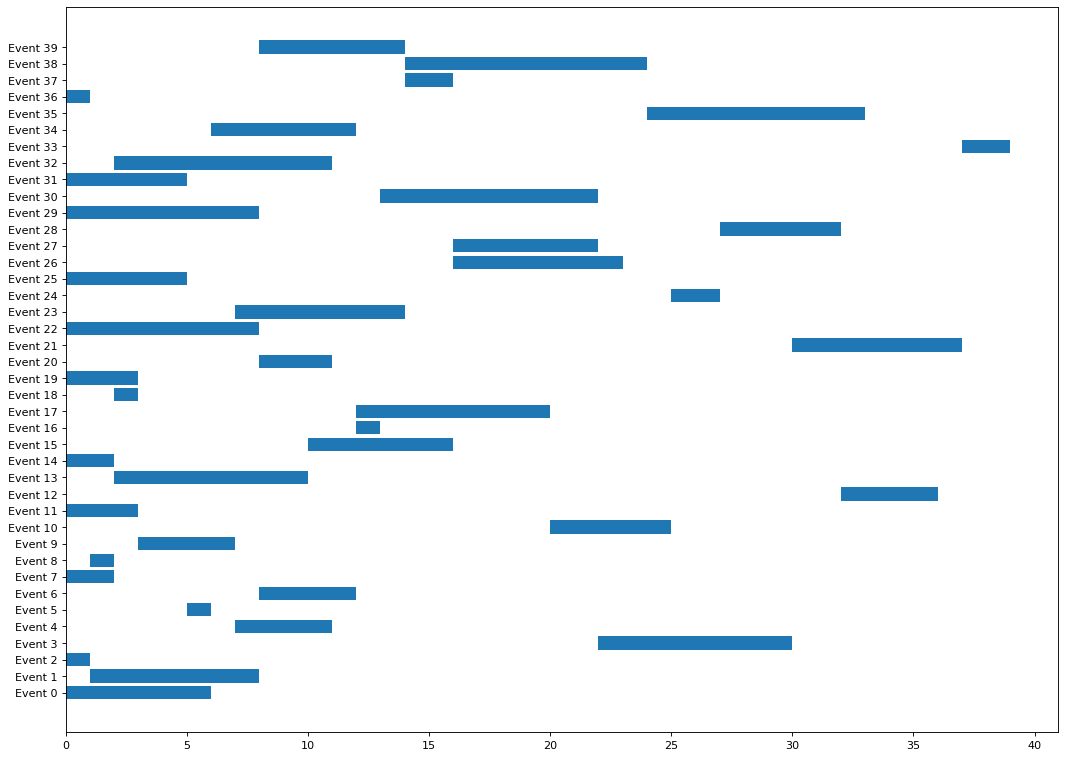

In [147]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(16, 12), dpi=80)

begin = S
end =   S+ro
event = ["Event {}".format(i) for i in range(len(begin))]

plt.barh(range(len(begin)),  end-begin, left=begin)

plt.yticks(range(len(begin)), event)
plt.show()

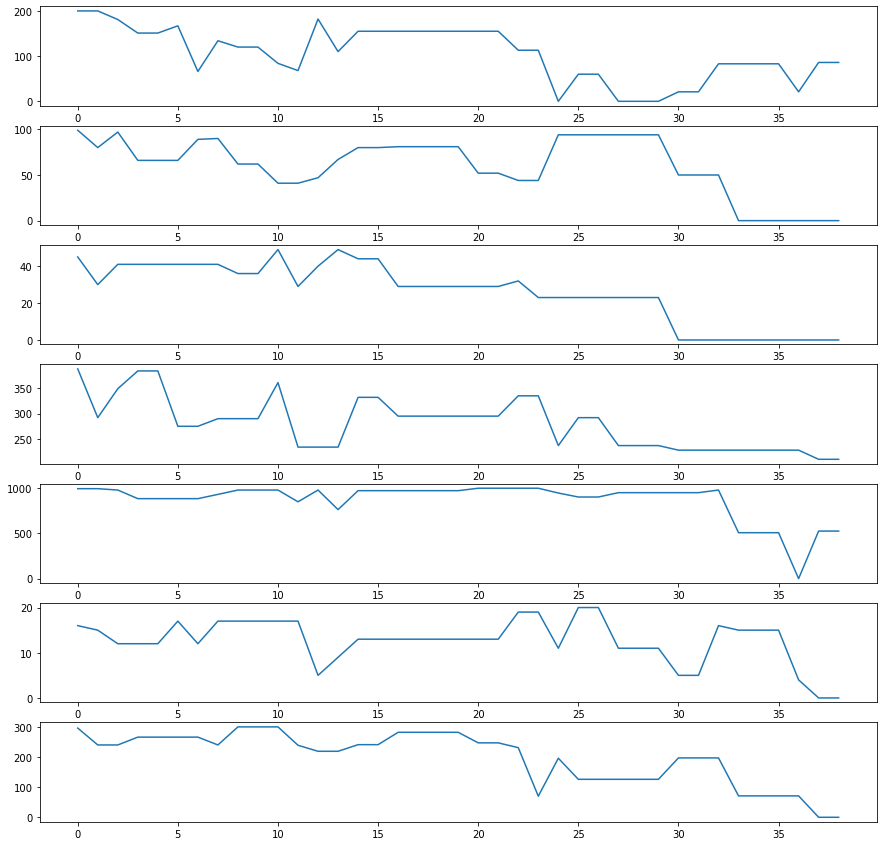

In [148]:
load = []
for t in range(int((S+ro).max())):
    indexes = (S<=t) & (S+ro > t)
    load.append( r[indexes].sum(axis=0))

load = np.array(load).T
fig, axs = plt.subplots(7, figsize=(15,15))
for i in range(7):
    axs[i].plot(load[i])
    